In [1]:
# Importing the necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv('data/netflix.csv')

# Displaying the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Descriptive Statistics
It is crucial to understand the dataset's overall characteristics through descriptive statistics.

We will use the df.descirbe() method to gain insights about the data

In [3]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Summary
To get a concise summary of the data, we use the df.info() function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The above function provides information about the number of non-null values and the data types of each column

### Checking for Missing Values

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Handling Missing Values
To handle missing values, we employ different strategies for different columns.

For the 'director' and 'cast' columns we replace missing values with 'No Data' to avoid any bias in the analysis

In [6]:
df['director'].replace(np.nan, 'No Data', inplace=True)

df['cast'].replace(np.nan, 'No Data', inplace=True)

In the 'country' column we fill in the missing value with the mode (most frequently occuring value) to ensure consistency

In [7]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

For the 'rating' column, we fill in the missing values based on the 'type' of the show 

In [8]:
# Finding the mode rating for movies and TV shows
movie_rating = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

# Filling the missing rating value based on the type of content
df['rating'] = df.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                        else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                        else x['rating'], axis=1)

For the 'duration' column, we fill in missing values based on the 'type' of the show. We assing the mode of 'duration' for movies and TV Shows respectively

In [9]:
# Finding the mode duration for movies and TV shows
movie_duration = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_duration = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

# Filling the missing duration value based on the type of content
df['duration'] = df.apply(lambda x: movie_duration if x['type'] == 'Movie' and pd.isna(x['duration'])
                          else tv_duration if x['type'] == 'TV Show' and pd.isna(x['duration'])
                          else x['duration'], axis=1)

### Dropping the Remaining Missing Values

In [10]:
df.dropna(inplace=True)

### Handling the 'date_added' column
We convert the 'date_added' column to datetime format 

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'])

### Data Transformations    
We extract additional attributes such as 'month', 'month_name', and 'year' from the 'date_added' column to enhance our analysis capabilities

In [12]:
# Extracting 'month', 'month_name' and 'year'
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

### Data Transformation: Cast, Country, Listed In, and Director
To analyze categorical attributes more effectively, we transform them into separate dataframes, allowing for more exploration and analysis.

In [15]:
# Splitting and expandin the 'cast' column
df_cast = df['cast'].str.split(',', expand=True).stack()

df_cast = df_cast.reset_index(level=1, drop=True).to_frame('cast')

df_cast['show_id'] = df['show_id']
df_cast.head()

,cast,show_id
0,No Data,s1
1,Ama Qamata,s2
1,Khosi Ngema,s2
1,Gail Mabalane,s2
1,Thabang Molaba,s2


In [18]:
# Splitting and expanding the 'country' column
df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']

df.country.head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: country, dtype: object

In [21]:
# Splitting and expanding the 'listed_in' column
df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']

df_listed_in.head()

,listed_in,show_id
0,Documentaries,s1
1,International TV Shows,s2
1,TV Dramas,s2
1,TV Mysteries,s2
2,Crime TV Shows,s3


In [24]:
# Splitting and expanding the 'director' column
df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']

df_director.head()

,director,show_id
0,Kirsten Johnson,s1
1,No Data,s2
2,Julien Leclercq,s3
3,No Data,s4
4,No Data,s5


## Exploratory Data Analysis

### Distribution of Content Types

In [25]:
# Calculate the percentage distribution of content types
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y)*100).round(2)

In [26]:
# Create a dataframe to store the percentage distribution
mf_ratio = pd.DataFrame(r)
mf_ratio.rename({'type': '%'}, axis=1, inplace=True)

mf_ratio

,%
type,
Movie,69.69
TV Show,30.31


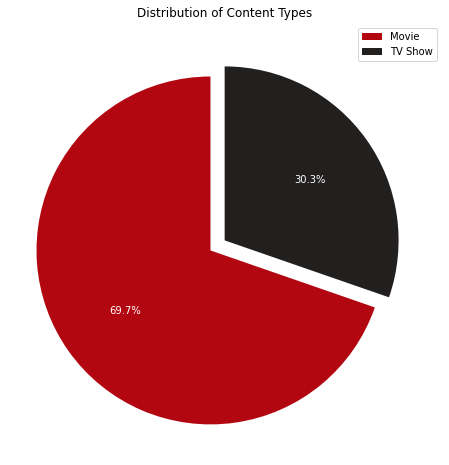

In [27]:
#Plot the Pie-chart
plt.figure(figsize=(12, 8))
colors = ['#b20710', '#221f1f']
explode = (0.1, 0)

plt.pie(mf_ratio['%'],
        colors=colors,
        explode=explode,
        labels=mf_ratio.index,
        autopct='%1.1f%%',
        startangle=90, 
        textprops={'color': 'white'})

plt.legend(loc = 'upper right')
plt.title('Distribution of Content Types')
plt.show()

The pie chart visualization shows that approximately 70% of the content on Netflix consists of film, while the remaining 30% are TV shows

### Top 10 Actors by Movie/TV Show Count


In [28]:
# Count the occurence of each actor
actor_counts = df_cast['cast'].value_counts()[1:]

# Select the Top 10 actors
top_10_actors = actor_counts.head(10)

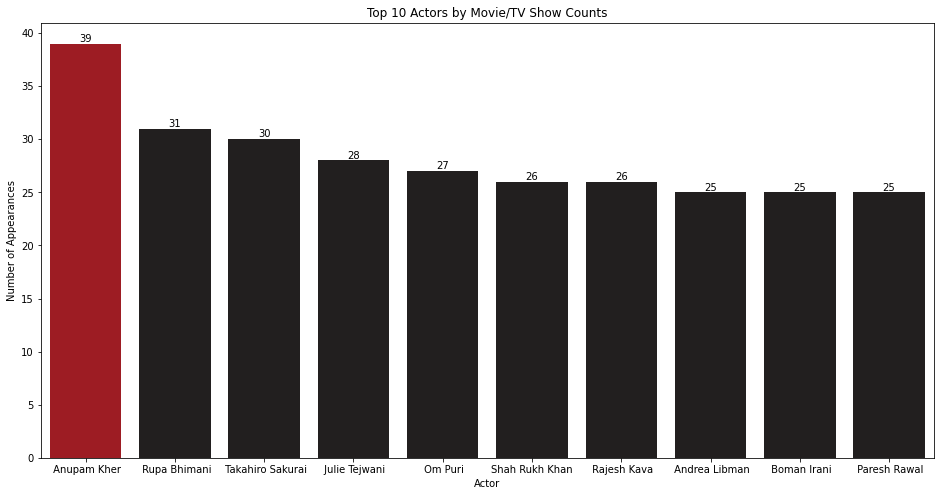

In [29]:
plt.figure(figsize=(16, 8))
colors = ['#b20710'] + ['#221f1f'] * (len(top_10_actors) - 1)
bar_plot = sns.barplot(x=top_10_actors.index,
                       y=top_10_actors.values,
                       palette=colors)

plt.title('Top 10 Actors by Movie/TV Show Counts')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')

# Adding count values on top of each bar
for index, value in enumerate(top_10_actors.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

The bar chart shows that Anupam Kher has the highest appearances in movies and TV shows.

### Top 10 Directors by Movie/TV Show Count

In [30]:
# Conut the occurences of each director
director_counts = df_director['director'].value_counts()[1:]

# Selecting the Top 10 Directors
top_10_directors = director_counts.head(10)

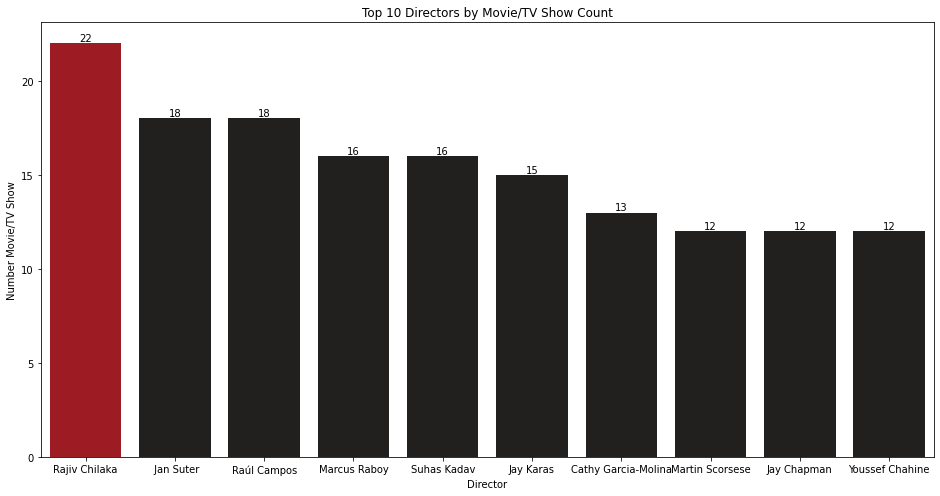

In [31]:
plt.figure(figsize=(16,8))
colors = ['#b20710'] + ['#221f1f'] * (len(top_10_actors) - 1)
bar_plot = sns.barplot(x=top_10_directors.index,
                       y=top_10_directors.values,
                       palette=colors)

plt.title('Top 10 Directors by Movie/TV Show Count')
plt.xlabel('Director')
plt.ylabel('Number Movie/TV Show')

# Adding count values on top of each bar
for index, value in enumerate(top_10_directors.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

The bar chart displays that Rajiv Chilaka seems to have directed the most content

### Top 10 Categories by Movie/TV Show Count

In [32]:
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.strip()
df_listed_in

,listed_in,show_id
0,Documentaries,s1
1,International TV Shows,s2
1,TV Dramas,s2
1,TV Mysteries,s2
2,Crime TV Shows,s3
...,...,...
8805,Children & Family Movies,s8806
8805,Comedies,s8806
8806,Dramas,s8807
8806,International Movies,s8807


In [33]:
# Count the occurences of each Categories
categories_count = df_listed_in['listed_in'].value_counts()

# Select Top 10 Categories
top_10_categories = categories_count.head(10)

top_10_categories

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

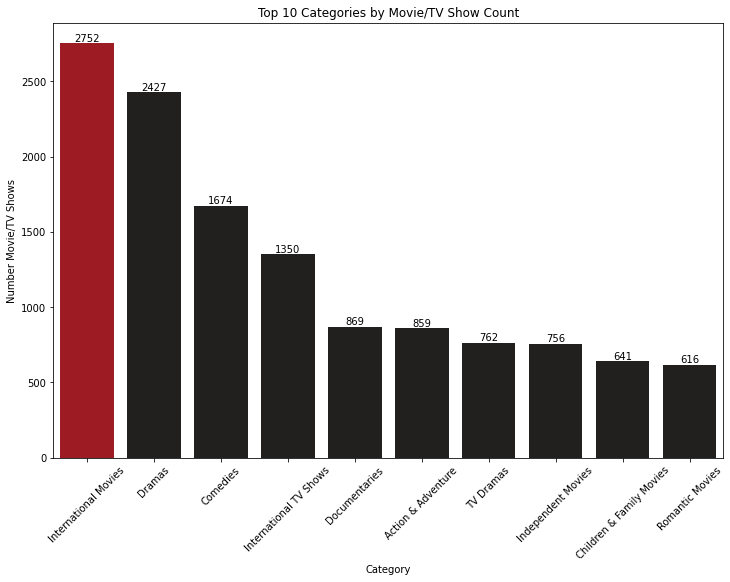

In [34]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_10_categories.index,
                       y=top_10_categories.values,
                       palette=colors)

plt.title('Top 10 Categories by Movie/TV Show Count')
plt.xlabel('Category')
plt.ylabel('Number Movie/TV Shows')
plt.xticks(rotation=45)

# Adding count values on top of each bar
for index, value in enumerate(top_10_categories.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

The bar chart shows that “International Movies” is the most dominant category, followed by “Dramas.”

### Movies & TV Shows Added Over Time


In [36]:
# Filter the datatframe to include only Movies and TV Shows
df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

# Group the data by year and count the number of Movies and TV Shows added in each year
movies_count = df_movies['year_added'].value_counts().sort_index()
tv_show_counts = df_tv_shows['year_added'].value_counts().sort_index()

print(movies_count)
print(tv_show_counts)

2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
Name: year_added, dtype: int64
2008      1
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    595
2021    505
Name: year_added, dtype: int64


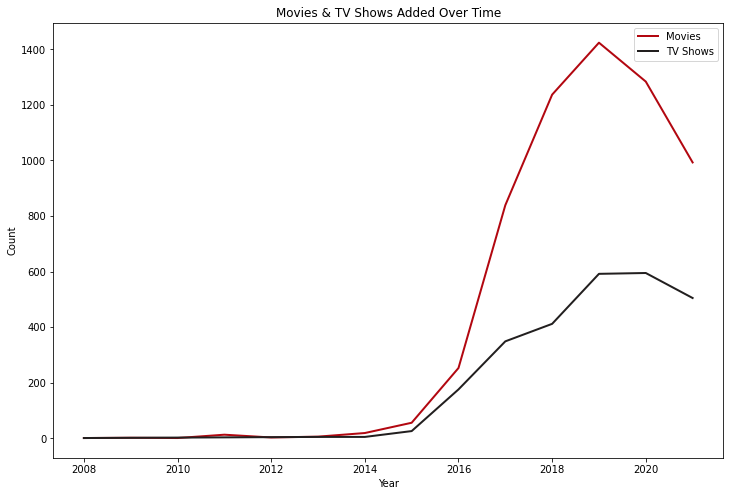

In [38]:
plt.figure(figsize=(12,8))
plt.plot(movies_count.index,
         movies_count.values,
         color='#b20710',
         label='Movies',
         linewidth=2)

plt.plot(tv_show_counts.index,
         tv_show_counts.values,
         color='#221f1f',
         label='TV Shows',
         linewidth=2)

plt.title('Movies & TV Shows Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

Netflix saw its real growth starting from the year 2015, & we can see it added more Movies than TV Shows over the years.

### Content Added by Month


In [43]:
# Extract the month from the 'date_added' column
df['month_added'] = pd.to_datetime(df['date_added']).dt.month_name()

# Define the order of the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

# Count the muber of shows added in each month
monthly_counts = df['month_added'].value_counts().loc[months_order]

#Determine the max count
max_count = monthly_counts.max()

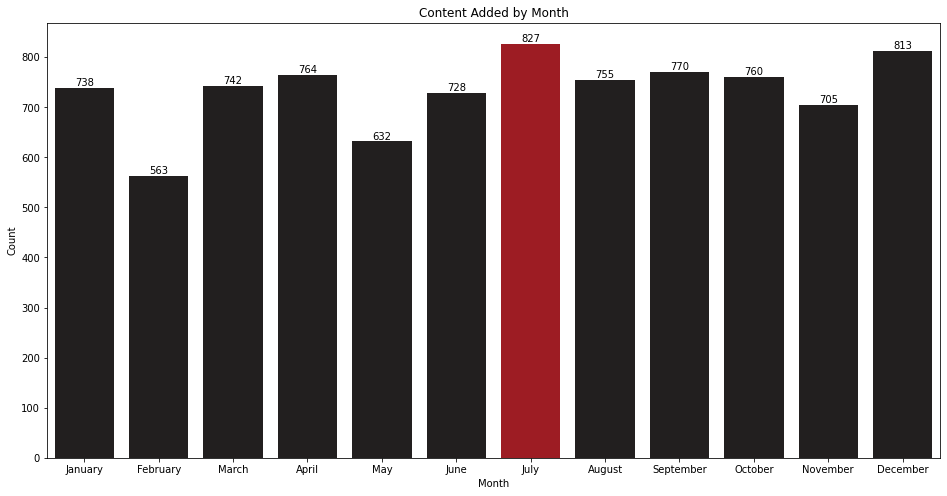

In [44]:
# Creating the bar chart
plt.figure(figsize=(16, 8))

# Setting the color for the highest bar and the rest of the bars
colors = ['#b20710' if count == max_count else '#221f1f' for count in monthly_counts]

bar_plot = sns.barplot(x=monthly_counts.index,
                       y=monthly_counts.values,
                       palette=colors)

plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Add count values on top of each bar
for index, value in enumerate(monthly_counts.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

The bar chart shows that July and December are the months when Netflix adds the most content to its library

### Distribution of Ratings

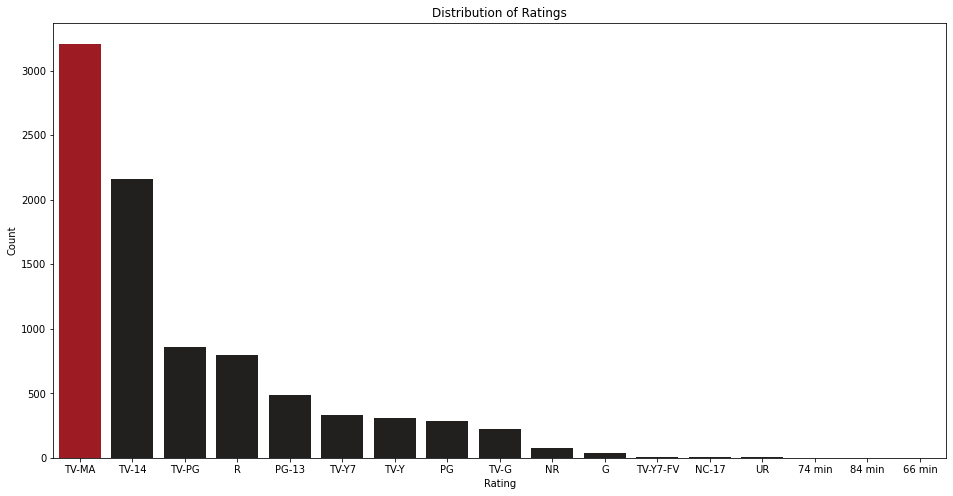

In [45]:
# Count the occurences of each rating
rating_counts = df['rating'].value_counts()

# Creating a bar chart to visualize the ratings
plt.figure(figsize=(16,8))
colors = ['#b20710'] + ['#221f1f'] * (len(rating_counts) - 1)
sns.barplot(x=rating_counts.index,
            y=rating_counts.values,
            palette=colors)

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Genre Correlation Heatmap


In [54]:
# Extracting unique 'Genre' from the 'listed_in' column

genres = df_listed_in['listed_in'].unique()

# Create a new DataFrame to store the genre data
genre_data = pd.DataFrame(index=genres, columns=genres, dtype=float)
# Fill the genre data DataFrame with zeros
genre_data.fillna(0, inplace=True)

# Iterate over each row in the original DataFrame and update the genre data DataFrame
for _, row in df.iterrows():
    listed_in = row['listed_in'].split(', ')
    for genre1 in listed_in:
        for genre2 in listed_in:
            genre_data.at[genre1, genre2] += 1

# print(genres)

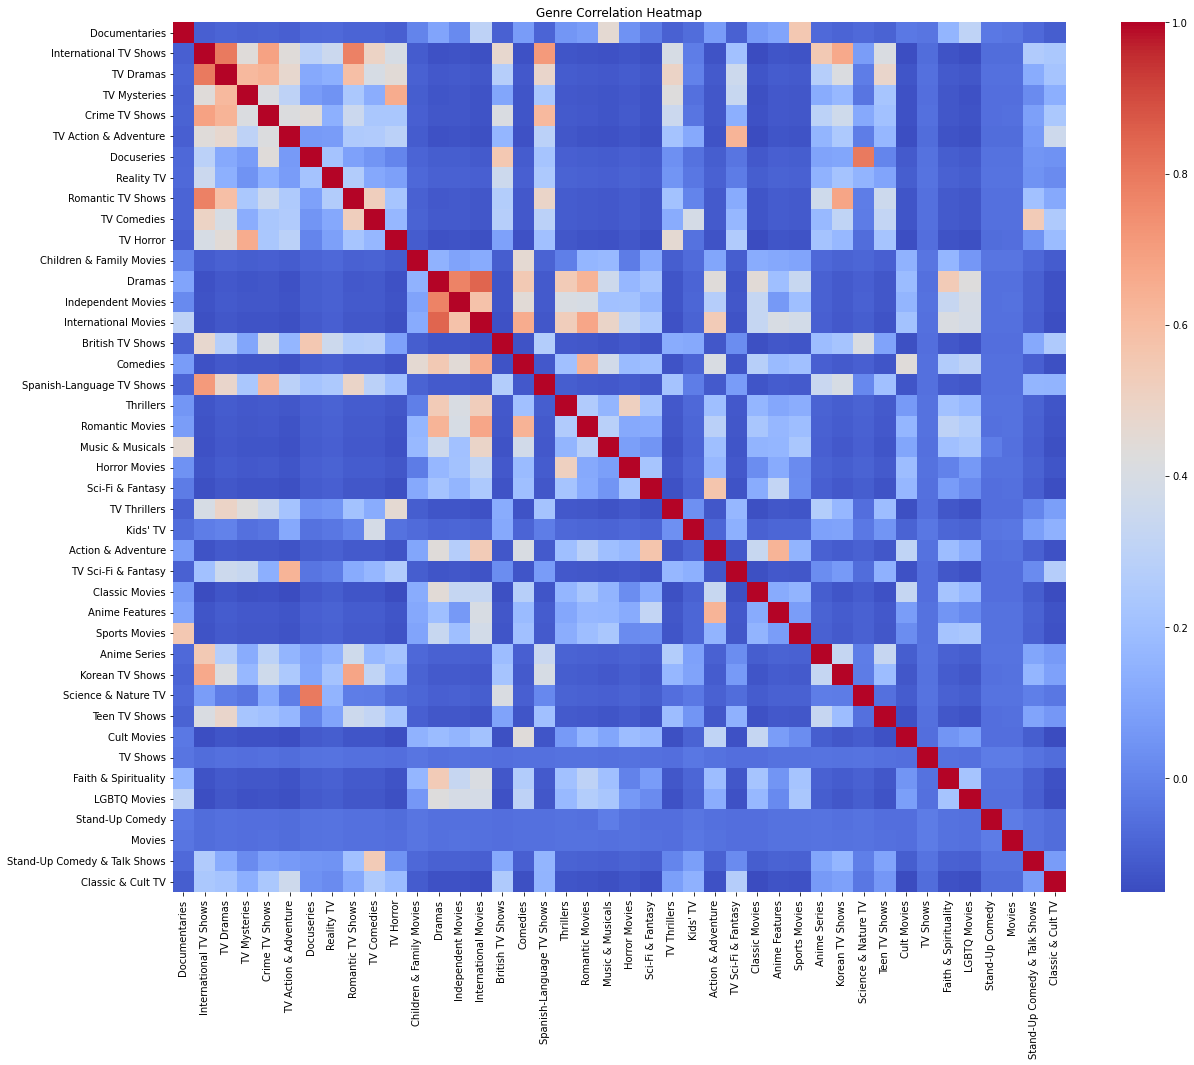

In [55]:
# Create a correlation matrix using the genre data
correlation_matrix = genre_data.corr()

# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Customize the plot
plt.title('Genre Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

### Most Common Words in Titles and Descriptions

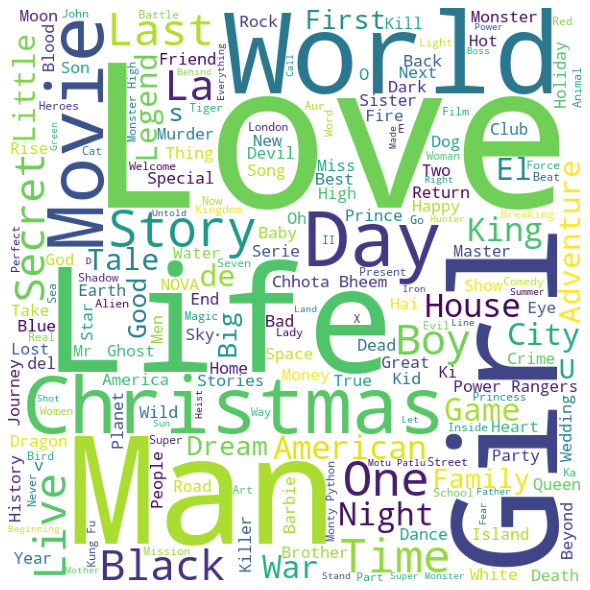

In [58]:
from wordcloud import WordCloud

# Concatenate all the titles into a single string
text = ' '.join(df['title'])

wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 10).generate(text)
 
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

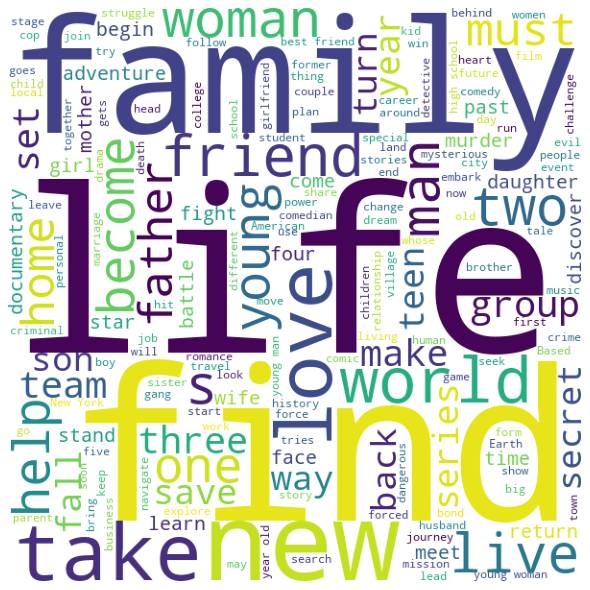

In [60]:
# Concatenate all the description into a single string
text = ' '.join(df['description'])

wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 10).generate(text)
 
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Duration Distribution for Movies and TV Shows

In [65]:
# Extracting and converting the duration for movies
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(float)

df_movies.head()

C:\Users\Zuhair Bhati\AppData\Local\Temp\ipykernel_3760\942501978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(float)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021


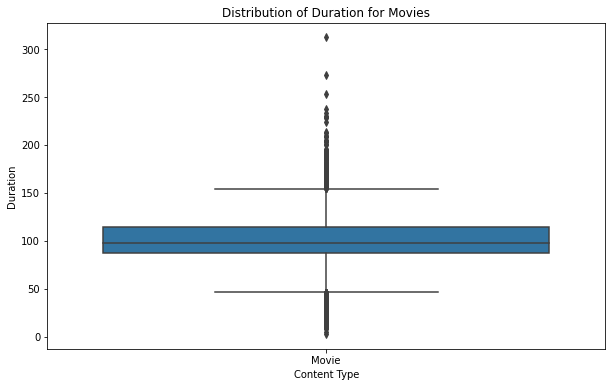

In [66]:
# Creating a boxplot for movie duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_movies, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()

Analyzing the movie box plot, we can see that most movies fall within a reasonable duration range, with few outliers exceeding approximately 2.5 hours

In [71]:
# Extracting and converting the duration for TV shows
df_tv_shows['duration'] = df_tv_shows['duration'].astype(str).str.extract('(\d+)', expand=False).astype(int)

df_tv_shows.head()

C:\Users\Zuhair Bhati\AppData\Local\Temp\ipykernel_3760\3910449082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['duration'] = df_tv_shows['duration'].astype(str).str.extract('(\d+)', expand=False).astype(int)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,year_added
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,September,2021


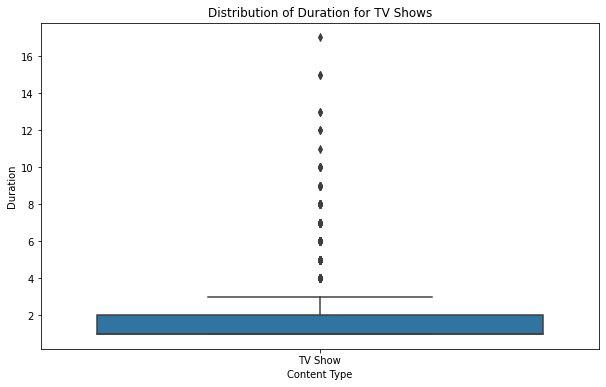

In [72]:
# Creating a boxplot for TV show duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tv_shows, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.show()

For TV shows, the box plot reveals that most shows have one to four seasons, with very few outliers having longer durations.

### Top 10 Countries Where Netflix is Popular


In [75]:
# Removing White space from the 'country' column
df_country['country'] = df['country'].str.strip()

# Finding value counts for country
country_counts = df_country['country'].value_counts()

# country_counts

# Selecting the top 10 countries
top_10_countries = country_counts.head(10)

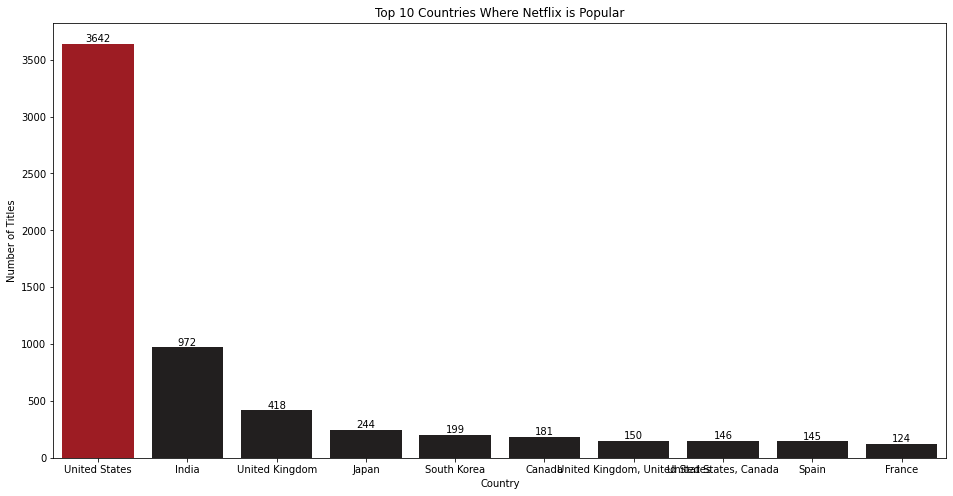

In [76]:
# Plotting the Top 10 Countries
plt.figure(figsize=(16,8))
colors = ['#b20710'] + ['#221f1f'] * (len(top_10_countries) - 1)
bar_plot = sns.barplot(x=top_10_countries.index,
                       y=top_10_countries.values,
                       palette=colors)

plt.title('Top 10 Countries Where Netflix is Popular')
plt.xlabel('Country')
plt.ylabel('Number of Titles')

# Add count values on top of each bar
for index, value in enumerate(top_10_countries.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()